<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/defesa/PSD_histogram_new_segmentation_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import r2_score
from google.colab import files

In [2]:
Repetir = 40

In [3]:
# New version change routine inside MarquesGabi_Routines
# Try to improve segmentation 
# New routine is called Segment_Filter_revisited_One... Two,Three, etc
# this exemple threshold 0.4


In [4]:
#!pip install mahotas

In [5]:
def BlackWhite(Transfere,Size):

  img_name=[]
  xw=[]
  ww=[]

  with zipfile.ZipFile(Transfere, "r") as f:
    for name in f.namelist():
      img_name.append(name)
      #xw.append(cv2.imread(name))
      xw.append(cv2.resize(cv2.imread(name),(Size,Size)))

  nrow=len(img_name)
  ncol=Size*Size
  pw=np.zeros((nrow,ncol))
  #pw=[]
  for i in range(nrow):
    ww.append(cv2.cvtColor(np.array(xw[i]), cv2.COLOR_BGR2GRAY))
    pw[i,:]=ww[i].ravel()
  return ww,img_name

In [6]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip' 
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 464, done.
remote: Counting objects: 100% (214/214), done.
remote: Compressing objects: 100% (213/213), done.
remote: Total 464 (delta 102), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (464/464), 166.11 MiB | 25.01 MiB/s, done.
Resolving deltas: 100% (225/225), done.
/content/Doutorado


In [7]:
labels =[]
with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)
print(labels)

['Fotos_Grandes-3cdAmostra/Q6-8-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-1.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-1.jpg', 'Fotos_Grandes-3cdAmostr

In [8]:
Size=1200 # tamanho da foto
ww,img_name=BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [9]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 196, done.
remote: Counting objects: 100% (196/196), done.
remote: Compressing objects: 100% (194/194), done.
remote: Total 196 (delta 83), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (196/196), 211.75 MiB | 22.30 MiB/s, done.
Resolving deltas: 100% (83/83), done.
Checking out files: 100% (51/51), done.
/content/Doutorado/MarquesGabi_Routines


In [10]:
FILE='SugarSample03.zip'
img_name=[]
x_original = [] 

data_file ='xls'


file_name = zipfile.ZipFile(FILE, 'r')
file_name.extractall()

k = 0
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
      if(name[-3:] == data_file):
        #df =pd.read_csv(name)
        if( k > 0):
          df_old = df_ImgJ.copy()
        df_ImgJ = pd.read_excel(name)
        df_ImgJ = df_ImgJ.drop(labels=[0], axis=0)
        if(k > 0):
          df_ImgJ = pd.concat( [df_ImgJ, df_old], ignore_index = True)
        k = k + 1

In [11]:
f.namelist()

['Results_03_02.xls', 'Results_03_03.xls', 'Results_03_01.xls']

In [12]:
df_ImgJ.shape

(174, 13)

In [13]:
df_ImgJ.head()

,,Area,Mean,Min,Max,Major,Minor,Angle,Feret,FeretX,FeretY,FeretAngle,MinFeret
0,2,1.288,255,255,255,1.383,1.185,5.847,1.636,767,213,18.157,1.161
1,3,0.407,255,255,255,0.814,0.637,62.186,0.877,283,234,59.036,0.667
2,4,0.592,255,255,255,0.925,0.815,117.923,1.078,633,154,122.335,0.802
3,5,1.391,255,255,255,1.435,1.235,29.966,1.564,1321,333,53.253,1.165
4,6,0.549,255,255,255,0.923,0.758,136.396,1.024,370,254,118.237,0.738


In [14]:
df_ImgJ.head()

,,Area,Mean,Min,Max,Major,Minor,Angle,Feret,FeretX,FeretY,FeretAngle,MinFeret
0,2,1.288,255,255,255,1.383,1.185,5.847,1.636,767,213,18.157,1.161
1,3,0.407,255,255,255,0.814,0.637,62.186,0.877,283,234,59.036,0.667
2,4,0.592,255,255,255,0.925,0.815,117.923,1.078,633,154,122.335,0.802
3,5,1.391,255,255,255,1.435,1.235,29.966,1.564,1321,333,53.253,1.165
4,6,0.549,255,255,255,0.923,0.758,136.396,1.024,370,254,118.237,0.738


In [15]:
from Segment_Filter_revisited_One import Segmenta  # got image provided segmented

In [16]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 196, done.
remote: Counting objects: 100% (196/196), done.
remote: Compressing objects: 100% (194/194), done.
remote: Total 196 (delta 83), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (196/196), 211.75 MiB | 24.22 MiB/s, done.
Resolving deltas: 100% (83/83), done.
Checking out files: 100% (51/51), done.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [17]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [18]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [19]:
Img_Size = 28

In [20]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

Description = '3 layers of Convolution: 64, 128, 256 '
N1 = 20
N2 = 20

# make the CNN
model = Sequential()
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=256, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=N1))
model.add(Dropout(0.2))
model.add(Dense(units=N2))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [21]:
# training the model
r = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), 
              epochs=200, batch_size=32)

Epoch 1/200
11/11 [==============================] - 3s 140ms/step - loss: 0.4813 - accuracy: 0.7726 - val_loss: 0.6930 - val_accuracy: 0.5102
Epoch 2/200
11/11 [==============================] - 1s 117ms/step - loss: 0.2982 - accuracy: 0.8688 - val_loss: 0.6929 - val_accuracy: 0.5102
Epoch 3/200
11/11 [==============================] - 1s 117ms/step - loss: 0.1604 - accuracy: 0.9446 - val_loss: 0.6929 - val_accuracy: 0.5102
Epoch 4/200
11/11 [==============================] - 1s 115ms/step - loss: 0.1213 - accuracy: 0.9446 - val_loss: 0.6931 - val_accuracy: 0.5102
Epoch 5/200
11/11 [==============================] - 1s 115ms/step - loss: 0.0818 - accuracy: 0.9708 - val_loss: 0.6946 - val_accuracy: 0.5102
Epoch 6/200
11/11 [==============================] - 1s 117ms/step - loss: 0.0582 - accuracy: 0.9825 - val_loss: 0.6982 - val_accuracy: 0.5102
Epoch 7/200
11/11 [==============================] - 1s 117ms/step - loss: 0.0748 - accuracy: 0.9708 - val_loss: 0.6971 - val_accuracy: 0.5102

In [22]:
Y_test = yback(Y_test)

In [23]:
# pred_test= model.predict_classes(X_test)
pred_test = np.argmax(model.predict(X_test), axis=-1)

data = {'y_true': Y_test,'y_predict': pred_test}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

Predict   0   1
Actual         
0        56  16
1         1  74


In [24]:
print(METRICS)

              precision    recall  f1-score   support

           0       0.98      0.78      0.87        72
           1       0.82      0.99      0.90        75

    accuracy                           0.88       147
   macro avg       0.90      0.88      0.88       147
weighted avg       0.90      0.88      0.88       147



In [25]:
pred_test

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [26]:
'''
img=ww[4] 
df=Segmenta(img)
df.shape
'''

'\nimg=ww[4] \ndf=Segmenta(img)\ndf.shape\n'

In [27]:
Sample3 =[4,13,25]

for i in range(Repetir):
  k = 0
  for i in Sample3:
    img=ww[i]
    if( k > 0):
      df_old = df_ann.copy()
    df_ann=Segmenta(img)
    if(k > 0):
      df_ann = pd.concat( [df_ann, df_old], ignore_index = True)
    k = k + 1
#df_ann = df.copy

df_teste = np.array(df_ann)
names = df_ann.columns
df_teste = pd.DataFrame(df_teste,columns=names)
Width = df_ann['Width']
#del df_ann['Width']
names = df_ann.columns
del df_ann['Width']
result = np.array(df_ann)
result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
prediction= np.argmax(model.predict(result), axis=-1)

In [28]:
df_ann

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,188.416962,194.922226,192.943344,197.868439,206.030411,212.608536,204.540237,174.371918,167.849533,150.362930,152.546326,169.167801,166.647263,144.491348,141.652679,148.145981,157.450668,148.040695,153.292389,152.660339,144.097122,131.652161,101.907654,88.256706,137.010315,154.993942,173.266495,180.881760,195.225266,186.577087,208.484894,205.177460,200.290680,192.108078,175.932510,165.067657,191.024323,209.626007,171.681473,169.223038,...,191.279984,195.942932,180.783340,110.091293,85.073593,112.262138,129.556488,130.954300,127.360298,119.609482,126.736824,131.075836,171.253159,163.792740,160.818878,149.132782,167.349609,178.077026,156.263580,141.940964,130.816620,125.398224,121.129227,155.420670,121.339684,95.005951,92.530060,111.850975,143.529419,142.571548,103.095398,88.458847,111.167671,126.819664,129.599823,132.273895,132.125519,122.278252,119.840286,106.718071
1,154.374207,140.262482,130.063904,134.610184,128.994781,124.618469,116.139175,111.822006,115.373962,111.770180,98.896332,72.046158,58.957397,51.007576,46.571835,49.668636,56.440475,60.704144,64.439522,64.546989,60.337990,58.715267,45.715740,9.202130,0.769231,1.006864,1.323314,0.400237,160.334442,151.986511,141.530426,138.015152,132.188171,128.415863,124.490891,118.308632,115.921181,112.253021,71.025574,55.159527,...,1.246391,1.707929,0.784852,0.039763,0.999053,1.891361,1.039763,0.092544,0.707929,1.631006,1.323314,0.400237,2.204497,5.318817,4.957160,4.075267,1.513136,0.855148,0.029822,0.922130,1.855148,1.092545,0.169467,0.631006,1.554083,1.400237,0.477160,0.323314,1.246391,1.707929,0.784852,0.039763,0.999053,1.891361,1.039763,0.092544,0.707929,1.631006,1.323314,0.400237
2,88.951569,86.844040,69.616112,57.459198,62.798668,64.663826,65.850975,64.808830,63.266563,58.492222,32.335232,3.722624,1.240777,1.418292,1.176930,0.373512,0.305136,1.108554,1.928483,1.034773,0.159836,0.518811,1.322230,1.749580,0.915480,0.030682,0.732486,1.535905,39.709694,39.570171,49.022060,56.284248,60.153774,63.823872,63.810211,59.798668,57.658123,54.045292,23.824018,1.973336,...,0.305136,1.108554,1.928483,1.034773,0.159836,0.518811,1.322230,1.749580,0.915480,0.030682,0.732486,1.535905,0.967492,0.047045,0.664110,1.467529,1.604281,0.800862,0.014318,0.863467,1.681204,1.390606,0.587187,0.091460,1.018409,1.876470,1.176930,0.373512,0.305136,1.108554,1.928483,1.034773,0.159836,0.518811,1.322230,1.749580,0.915480,0.030682,0.732486,1.535905
3,244.191391,230.920044,190.375488,166.618668,161.263992,158.683746,163.019089,178.953781,182.846527,184.876984,184.507904,174.115204,156.406158,149.769333,171.616272,175.159592,161.499222,139.833984,128.730530,147.684341,168.301483,186.794617,193.893875,193.118561,189.485336,181.960739,172.494049,133.955154,208.555527,204.879776,159.223145,165.430389,143.514359,138.377289,147.524323,130.727020,133.969803,142.956482,153.063812,161.000473,...,1.000000,1.232060,0.891546,0.425468,1.637971,0.653663,0.582829,1.647891,0.486382,0.777036,1.611044,0.329022,136.001358,110.412338,34.783997,1.715788,1.000000,1.000000,1.000000,1.000000,1.000000,1.042310,0.710660,0.892061,1.000000,1.000000,1.000000,1.000000,1.000000,1.233503,0.854029,0.406710,1.605143,0.630215,0.564070,1.610374,0.467623,0.740859,1.590946,0.310263
4,239.646027,235.540329,229.583405,219.250153,207.931503,200.262283,169.066299,155.911041,154.852646,155.297012,157.858490,156.053024,148.671722,156.136856,158.037125,150.347519,149.599045,152.924255,155.858551,162.352386,160.971619,158.452393,171.000336,201.297485,215.070450,214.977768,207.600494,185.321320,233.290314,231.173981,220.375351,213.265030,203.887115,194.463089,171.011124,165.442200,160.282410,160.219727,158.589355,160.003891,...,177.963196,145.759323,140.233826,138.502655,141.055283,140

In [29]:
df_teste.shape # por que esta saindo 100 ???????

(150, 785)

In [30]:
#df_ann

In [31]:
img_graos = []
Width_new = []
k = 0
for i in prediction:
  if( i == 0):
    img_graos.append(df_teste.iloc[k,:])
    Width_new.append(Width.iloc[k])

  k = k +1

img_graos = pd.DataFrame(img_graos, columns=names )


In [32]:
img_graos.shape

(20, 785)

In [33]:
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1])

In [34]:
img_graos.shape

(20, 785)

In [35]:
Width=np.array(Width_new)

In [36]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
#from GetBetterSegm import GetBetter

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 801, done.
remote: Counting objects: 100% (562/562), done.
remote: Compressing objects: 100% (560/560), done.
remote: Total 801 (delta 366), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (801/801), 6.12 MiB | 10.80 MiB/s, done.
Resolving deltas: 100% (503/503), done.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [37]:

!git clone https://github.com/ucfilho/marquesgabi_out_2020
#!git clone https://github.com/marquesgabi/Doutorado
%cd marquesgabi_out_2020
#%cd Doutorado
#PSD_imageJ = 'Amostra7.csv' 
#PSD_new = pd.read_csv(PSD_imageJ,sep=';')
#encoding='utf8'

PSD_imageJ = 'Areas_ImageJ.csv'
PSD_new = pd.read_csv(PSD_imageJ)
print(PSD_new.head(3))
''''''

Cloning into 'marquesgabi_out_2020'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 146 (delta 75), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (146/146), 1.00 MiB | 12.53 MiB/s, done.
Resolving deltas: 100% (75/75), done.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020
   Juntas   Area
0       1  2.001
1       2  0.820
2       3  1.270


''

In [38]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [39]:
Width.shape

(20,)

In [40]:
Width

array([166, 162, 110, 196, 124, 121, 170, 185, 181, 171, 145, 135, 163,
       128, 108, 130, 120, 193, 131, 174])

In [41]:
img_graos.shape

(20, 785)

In [42]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
18,166.0,139.829147,131.492661,122.199005,96.202782,105.600365,125.188705,137.031494,151.635635,162.864990,171.140503,177.123505,192.935684,191.144135,185.196106,179.394836,177.526047,177.853546,180.467545,184.119598,170.119598,134.042236,160.113342,170.863678,173.103790,168.732468,177.062851,191.286972,199.096786,136.452454,135.570160,134.642334,122.624901,121.971970,153.551025,167.432114,175.268387,180.303223,181.381180,184.133820,...,173.181152,171.795151,198.226578,211.045563,207.052094,202.297852,182.744370,162.782394,122.587601,127.430389,145.671051,152.241837,175.957901,143.216705,144.026413,156.825073,165.610962,175.088684,177.538818,175.230789,171.046570,161.299469,141.942078,154.576126,155.741028,154.779480,153.726379,155.834656,164.777893,172.787170,191.823914,202.746521,199.259369,198.563782,214.210175,236.583511,246.765259,244.670624,212.225571,190.399185
28,162.0,166.074844,161.101807,158.007004,155.901535,143.246155,120.466095,128.735870,139.676575,145.932785,139.396591,136.005630,138.661636,151.903214,160.083069,171.706146,171.349487,155.200577,148.259872,147.682220,146.342484,134.954117,102.150284,98.940254,153.143585,190.655701,189.115387,176.648682,162.431946,165.551132,164.201355,166.780975,168.640778,150.542892,147.944519,153.069351,159.757660,166.024536,162.823196,147.335938,...,65.431038,69.597466,65.411674,75.215057,102.174065,109.843323,108.005486,107.818924,102.509834,95.961746,103.297668,86.507545,136.219009,116.767418,116.381958,117.459534,121.925156,107.488647,80.937805,67.690140,95.819542,143.080627,167.749435,142.878525,78.570953,73.479958,73.700500,66.326935,66.152878,70.611946,68.131081,65.127876,96.980942,105.248283,111.293091,108.361221,99.650818,97.222832,95.464104,88.864494
31,110.0,113.860489,173.068436,191.561646,180.351059,167.946106,167.216858,163.096527,157.702148,148.507446,140.168915,140.353714,140.399994,143.895203,145.328583,150.492233,161.257843,165.003967,161.893219,162.366608,162.412231,155.595047,153.862793,150.922302,147.402985,141.227768,128.901810,169.395035,183.966278,84.798012,124.076027,156.466782,158.930237,151.234711,152.049911,153.108429,153.187103,145.924286,136.982788,137.075699,...,143.460815,156.180161,166.591049,171.027435,173.559998,172.656845,170.039337,164.010895,158.785461,156.967270,158.731552,160.627762,78.180161,78.818176,72.354706,107.729248,118.244621,89.199341,83.691902,114.862152,185.008255,226.694229,236.711731,244.820816,241.159988,184.916687,109.388428,114.448929,132.233063,157.391403,171.962952,168.643982,164.448593,160.039993,154.768585,146.431412,140.961990,145.293884,149.769592,153.033051
32,196.0,174.020401,170.877548,184.938766,198.448975,205.306122,219.693878,225.265305,217.285706,210.653061,212.326523,197.142853,194.836731,180.408157,184.000000,186.877548,181.265305,156.346939,158.142853,160.408157,166.183670,172.346939,159.102036,147.285706,160.326523,170.387756,154.102036,156.857147,156.530609,183.122452,175.428574,169.795914,205.387756,235.428574,239.367340,241.591827,246.346939,247.040817,240.040817,221.938766,...,113.448975,113.918365,115.877548,137.265305,180.000000,179.734695,183.530609,185.591827,186.204071,181.816330,184.551010,183.734695,204.469391,184.020401,186.346939,188.816330,184.571426,175.204071,168.836731,163.367340,159.734695,154.673462,156.530609,163.387756,156.244888,143.489792,134.244888,139.551010,138.285706,143.510208,151.408157,169.775513,189.530609,190.265305,186.061218,182.979584,182.693878,171.551010,179.408157,181.306122
38,124.0,101.729446,105.791870,117.604568,132.479706,131.363159,134.766907,146.172714,164.390213,170.485931,179.499466,184.552536,192.263245,192.238297,189.994797,184.262222,180.037445,179.922974,178.083237,180.654526,183.12

In [43]:
PSD_new.head()

,Juntas,Area
0,1,2.001
1,2,0.820
2,3,1.270
3,4,0.958
4,5,1.162


In [44]:
# 
Area = df_ImgJ['Area'].values
# Area = np.concatenate( (Area, [lost_value] ) )

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]



In [45]:
len(Diameter_All)

20

In [46]:
#

PSD_new['Area'].shape

(95,)

In [47]:
#PSD_new.shape

In [48]:
#lost_value = float(PSD_new.columns[1])
#Area2 = np.array(PSD_new.iloc[:,1])
#Area2 = np.concatenate( (Area2, [lost_value] ) )
Area2 = PSD_new['Area'].values
for A in Area2:
  Diam1.append((4*A/np.pi)**0.5) 


In [49]:
wt1 = np.ones(len(Diam1)) / len(Diam1)*100
wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
X = pd.DataFrame([Diam1,Diameter_All])
wts = pd.DataFrame([wt1,wt2])


In [50]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268
0,1.280599,0.719867,0.868192,1.330818,0.836067,0.923618,0.955465,0.904113,0.697408,0.911127,1.045198,0.970012,0.579772,0.628255,0.600272,0.659885,0.934581,0.731273,0.777682,1.113042,0.753568,0.874039,0.918781,0.970012,0.623168,1.355934,0.932536,0.906925,0.858607,0.660849,0.952796,1.028621,0.891348,0.85638,0.575363,1.260557,1.048239,0.606602,0.860088,0.769452,...,1.550444,0.782578,1.469061,1.053087,1.267607,0.7744,1.378748,1.363893,1.299352,1.287045,1.118178,0.947435,1.521848,1.352644,1.155694,1.601345,1.274619,1.422384,1.340826,1.172646,1.149065,1.45906,1.248377,1.336546,0.960117,1.486723,1.427745,1.350288,0.756098,1.259041,1.134568,1.654913,1.120453,1.117608,0.91531,1.163927,1.306681,1.152936,1.30473,1.306681
1,1.446610,1.354482,0.982869,1.755561,1.049680,1.067890,1.356544,1.341420,1.470583,1.332860,1.230779,1.185475,1.381694,1.085011,1.067792,1.003495,1.024067,1.743313,0.996232,1.424097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
Diameter_All

[1.446610252417115,
 1.354482461605878,
 0.982869278752842,
 1.7555606044510472,
 1.049679562928657,
 1.0678899838879994,
 1.3565441875167885,
 1.3414199395688164,
 1.470583101309668,
 1.3328600609429604,
 1.2307788125934571,
 1.1854752971435893,
 1.3816942003083954,
 1.085011396561194,
 1.0677922420624117,
 1.003494999489603,
 1.0240665822476605,
 1.7433133970318913,
 0.9962324125775431,
 1.4240971480979132]

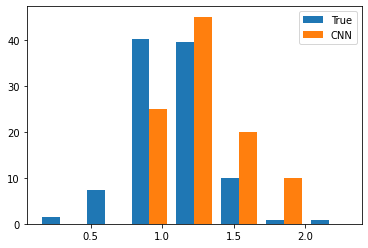

In [52]:
A = plt.hist(X,weights=wts,bins=7)
plt.legend(['True','CNN'])

In [53]:
print('ImgJ:','media=',np.mean(np.array(Diam1)),'desvio=',np.std(np.array(Diam1)),'pontos=',len(Diam1))

ImgJ: media= 1.0865462723070898 desvio= 0.279391220003608 pontos= 269


In [54]:
print('Software:','media=',np.mean(np.array(Diameter_All)),'desvio=',np.std(np.array(Diameter_All)),'pontos=',len(Diameter_All))

Software: media= 1.2650227960747715 desvio= 0.22942393421076387 pontos= 20


In [55]:
# Software: media= 1.3185563233999378 desvio= 0.2728642468732428 pontos= 66 theshold =0.8 e repete=80
# Software: media= 1.2650227960747715 desvio= 0.22942393421076387 pontos= 20 theshold =0.5 e repete=40

In [56]:
np.mean(np.array(Diameter_All))

1.2650227960747715

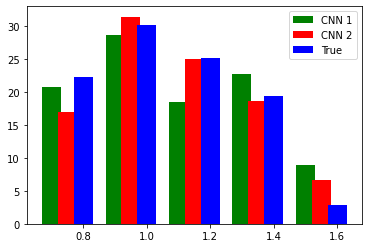

In [57]:
# Freq1 = [19.12043703, 29.22484843, 19.35872174, 20.82190224, 11.47409056] # avarage 4 samples
Freq1 = [20.69301557, 28.55598044, 18.50768331, 22.7106327, 8.905907357] # avarage 10 samples
#Freq2 = [16.93792791, 31.38008965, 24.93810752, 18.56158392, 6.233810752, 0.4]
Freq2 = [16.93792791, 31.38008965, 24.93810752, 18.56158392, 6.633810752]
Freq3 = [22.22489, 30.15078, 25.10463, 19.30926, 2.810434]
barWidth = 0.25

br1 = range(len(Freq1))
# Set position of bar on X axis
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
# labels = [0.8, 1.0, 1.2, 1.4, 1.6, 1.8]
labels = [0.8, 1.0, 1.2, 1.4, 1.6]

xx=[]
for a in labels:
  xx.append(str(a))
plt.bar(br1, Freq1 , color="green", align="center", width=0.3, tick_label= xx) 
plt.bar(br2, Freq2 , color="red", align="center", width=0.3, tick_label= xx)
plt.bar(br3, Freq3 , color="blue", align="center", width=0.3, tick_label= xx)
plt.legend(['CNN 1','CNN 2','True'])